## Amdahl's Law 

Improving a portion P of a computation by factor s results in an overall speedup of

<img src="./images/al1.png" width="256" title="Amdahl's Law Equation" />

* _p_ is the proportion of execution time that benefits from improved resources, i.e. the parallel part
* _(1-p)_ is the portion that does not benefit; i.e. the serial part
* _s_ is the speedup of the optimized part
* _S<sub>latency</sub>(s)_ theoretical speedup of the whole task

Paraphrased: speedup limited to fraction improved

<img src="./images/al2.png" width="512" title="Amdahl's Law Graph" />

### Visualizing Amdahl's Law



'data.frame':	64 obs. of  1 variable:
 $ X1...1...p....p.cores.: num  1 1.98 2.94 3.88 4.81 ...


ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'speedup' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. ggplot_build.ggplot(x)
19. by_l

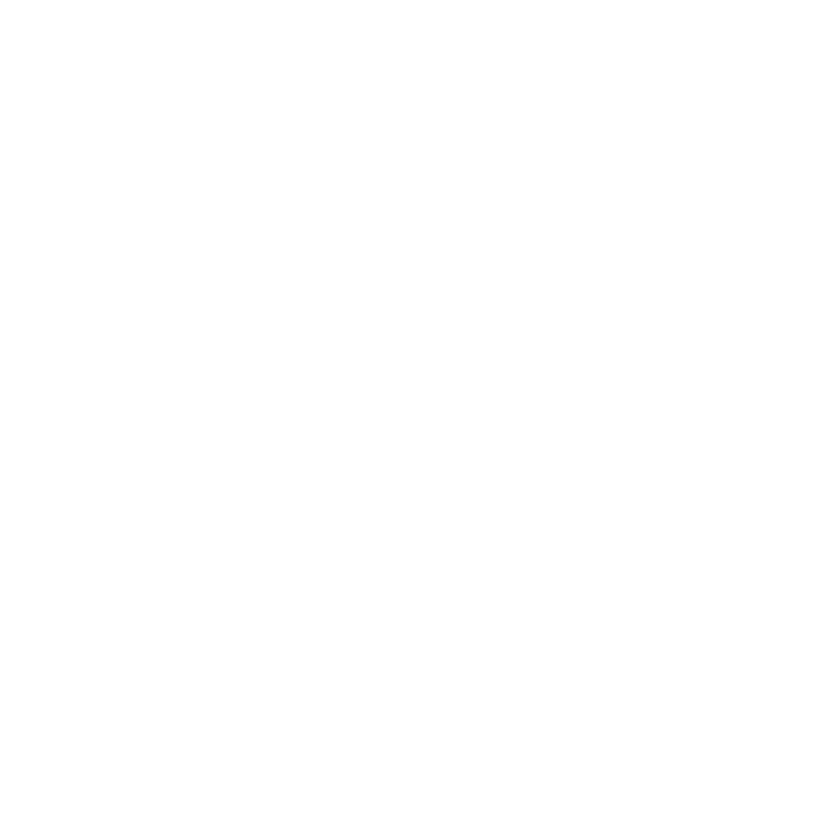

In [11]:
library(ggplot2)

# Let's assume we have a 4 socket x 16 core machine.  So up to 64 cores.
cores = seq(1:1:64)

# and a parallel fraction of 99%
p = .99

amdahl = data.frame(1/((1-p)+p/cores))
str(amdahl)

ggplot(data.frame(amdahl), aes(x=cores, y=speedup))

### Infering parallelism from Amdahl's Law